In [1]:
# load our dependencies
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# load our data into a dataframe
df = pd.read_csv('./data/covid-case-data.csv')

# visualize our data
df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/01,2020/07/19,NaN,2020/07/01,Laboratory-confirmed case,Male,30 - 39 Years,Hispanic/Latino,No,Missing,No,Missing
1,2020/10/11,2021/01/08,NaN,2020/10/11,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
2,2021/02/09,2021/02/09,2021/02/04,2021/02/10,Probable Case,Male,50 - 59 Years,Unknown,Missing,Missing,Missing,Unknown
3,2020/07/20,2020/07/20,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/06/05,2020/06/05,NaN,2020/06/05,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
999994,2020/10/23,2020/10/23,NaN,NaN,Probable Case,Male,50 - 59 Years,Unknown,Missing,Missing,Missing,Missing
999995,2021/04/02,2021/04/06,NaN,2021/04/02,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing
999996,2020/11/17,2020/11/17,NaN,NaN,Laboratory-confirmed case,Female,50 - 59 Years,Missing,Missing,Missing,Missing,Missing
999997,2020/10/23,2020/10/23,NaN,NaN,Probable Case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing


In [3]:
# let's clean the data up 
for column in df:
    print(f"{column}: {df[column].unique()}")
    
    df.drop(df.loc[df[column]=='Unknown'].index, inplace=True)
    df.drop(df.loc[df[column]=='Missing'].index, inplace=True)
    df.drop(df.loc[df[column]=='Other'].index, inplace=True)

    print(f"{column}: {df[column].unique()}\n")

cdc_case_earliest_dt : ['2020/07/01' '2020/10/11' '2021/02/09' '2020/07/20' '2020/06/05'
 '2021/01/31' '2020/05/18' '2020/12/08' '2020/08/09' '2020/11/20'
 '2020/10/19' '2021/01/07' '2021/03/17' '2020/12/09' '2020/12/16'
 '2021/04/19' '2021/01/05' '2020/11/09' '2021/01/01' '2020/07/12'
 '2020/08/01' '2020/11/04' '2020/08/10' '2020/12/18' '2020/11/30'
 '2021/01/04' '2021/04/14' '2021/01/22' '2021/04/03' '2021/01/08'
 '2020/11/24' '2020/08/27' '2020/12/31' '2020/04/24' '2020/12/01'
 '2020/11/03' '2021/01/12' '2020/09/30' '2021/03/19' '2021/02/25'
 '2020/12/17' '2020/10/06' '2020/04/22' '2021/03/18' '2020/04/13'
 '2021/02/05' '2021/02/06' '2021/04/12' '2020/11/16' '2020/11/19'
 '2021/01/19' '2021/04/18' '2020/04/07' '2020/10/17' '2020/10/31'
 '2020/03/18' '2020/10/02' '2020/04/20' '2020/11/18' '2020/11/28'
 '2020/11/29' '2021/04/17' '2020/12/22' '2021/04/16' '2020/12/26'
 '2020/12/23' '2021/03/25' '2021/03/10' '2020/05/29' '2021/03/20'
 '2020/11/13' '2021/04/02' '2020/11/08' '2020/06/22' 

cdc_report_dt: ['2020/07/19' '2021/01/08' '2021/02/09' '2020/07/20' '2020/06/05'
 '2021/01/31' '2020/05/30' '2020/12/08' '2021/03/19' '2020/11/20'
 '2020/11/04' '2021/01/14' '2021/03/17' '2021/03/20' '2020/12/16'
 '2021/04/30' '2021/01/06' '2021/03/26' '2021/01/01' '2020/07/16'
 '2020/08/01' '2020/12/12' '2020/08/14' '2020/12/25' '2020/11/30' nan
 '2021/04/14' '2021/01/22' '2021/04/20' '2021/03/22' '2020/08/27'
 '2021/01/11' '2020/06/24' '2020/12/10' '2020/12/22' '2020/11/03'
 '2021/01/12' '2020/10/09' '2021/03/21' '2021/02/26' '2021/01/07'
 '2021/02/02' '2020/06/20' '2021/03/18' '2020/04/20' '2021/02/08'
 '2020/11/16' '2020/11/09' '2020/11/19' '2021/01/19' '2021/04/29'
 '2020/04/07' '2020/11/07' '2020/10/31' '2020/11/02' '2021/01/25'
 '2020/04/29' '2020/11/18' '2020/11/28' '2020/12/21' '2021/04/23'
 '2020/12/30' '2021/04/19' '2020/12/09' '2021/03/01' '2020/12/23'
 '2021/03/25' '2021/03/10' '2020/12/31' '2021/01/23' '2020/11/26'
 '2020/11/08' '2020/11/10' '2021/04/17' '2020/06/28' '202

pos_spec_dt: [nan '2021/02/04' '2020/05/20' '2020/07/14' '2020/11/04' '2020/11/24'
 '2020/12/01' '2020/11/03' '2020/10/07' '2021/01/07' '2021/01/12'
 '2020/04/13' '2021/02/05' '2020/11/19' '2020/10/17' '2020/03/18'
 '2020/12/03' '2020/12/28' '2020/05/29' '2021/04/08' '2020/11/16'
 '2020/12/05' '2021/04/16' '2020/10/27' '2020/04/30' '2020/09/09'
 '2021/01/25' '2020/07/08' '2021/02/01' '2020/05/04' '2020/04/05'
 '2021/02/08' '2021/02/12' '2020/04/07' '2021/04/09' '2020/04/21'
 '2021/02/11' '2020/12/10' '2020/11/30' '2021/02/24' '2020/06/26'
 '2020/12/11' '2020/07/15' '2021/01/08' '2020/09/30' '2020/11/13'
 '2020/12/23' '2020/12/04' '2020/04/22' '2021/02/15' '2020/07/17'
 '2020/04/01' '2020/12/13' '2020/05/02' '2021/01/04' '2020/06/16'
 '2020/05/12' '2020/12/07' '2020/07/06' '2020/05/03' '2021/04/19'
 '2020/12/09' '2020/08/17' '2020/12/24' '2020/06/22' '2020/05/28'
 '2020/07/09' '2021/01/11' '2020/03/20' '2020/09/24' '2020/11/02'
 '2020/11/06' '2021/04/21' '2021/04/24' '2020/09/02' '2021/

onset_dt: ['2020/07/01' '2020/10/11' '2021/02/10' nan '2020/06/05' '2021/01/31'
 '2020/05/18' '2020/12/06' '2020/10/19' '2021/01/07' '2020/12/22'
 '2021/04/19' '2021/01/05' '2020/11/09' '2020/07/12' '2020/11/04'
 '2020/08/10' '2020/12/18' '2021/04/03' '2020/12/31' '2020/04/24'
 '2020/09/30' '2021/03/19' '2021/02/25' '2020/10/06' '2020/04/22'
 '2021/04/12' '2021/04/18' '2020/10/17' '2020/10/31' '2020/10/02'
 '2020/04/20' '2020/11/28' '2020/11/29' '2021/04/17' '2020/12/26'
 '2020/12/23' '2020/11/13' '2021/04/02' '2020/11/08' '2021/04/07'
 '2020/06/28' '2020/03/18' '2020/11/11' '2020/11/30' '2021/04/16'
 '2020/10/26' '2021/01/23' '2020/10/10' '2020/12/08' '2020/12/30'
 '2020/09/13' '2020/11/10' '2021/01/04' '2020/11/27' '2021/03/31'
 '2021/03/20' '2021/03/15' '2020/09/24' '2021/01/15' '2021/01/06'
 '2021/01/24' '2020/07/27' '2020/12/02' '2021/02/05' '2020/08/05'
 '2020/10/15' '2021/01/20' '2020/03/28' '2020/04/02' '2020/12/21'
 '2020/04/01' '2020/11/19' '2020/12/20' '2020/08/04' '2021/02/

In [4]:
# map the data
df.replace({
    'Male': 1, 
    'Female': 0, 
    'Yes': 1, 
    'No': 0,
    '0 - 9 Years': 0,
    '10 - 19 Years': 1,
    '20 - 29 Years': 2,
    '30 - 39 Years': 3,
    '40 - 49 Years': 4,
    '50 - 59 Years': 5,
    '60 - 69 Years': 6,
    '70 - 79 Years': 7,
    '80+ Years': 8,
    'Hispanic/Latino': 0,
    'Black, Non-Hispanic': 1,
    'White, Non-Hispanic': 2,
    'American Indian/Alaska Native, Non-Hispanic': 3,
    'Asian, Non-Hispanic': 4,
    'Multiple/Other, Non-Hispanic': 5,
    'Native Hawaiian/Other Pacific Islander, Non-Hispanic': 6
}, inplace=True)


# let's drop fields we don't need
df.drop(columns=['current_status', 'cdc_case_earliest_dt ', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'hosp_yn', 'icu_yn'], axis=1, inplace=True, errors='ignore')

# let's assign our features without our target to x
x = df.drop('death_yn', axis=1)

# let's assign our target to y
y = df.death_yn

# make sure we have clean data values
for column in df:
    print(f"{column}: {df[column].unique()}")


sex: [1 0]
age_group: [1 2 4 7 3 6 5 8 0]
race_ethnicity_combined: [2 5 0 1 4 3 6]
death_yn: [0 1]
medcond_yn: [1 0]


In [70]:
df

,sex,age_group,race_ethnicity_combined,death_yn,medcond_yn
66,1,1,2,0,1
208,0,2,5,0,0
211,1,4,2,0,0
222,1,7,2,0,1
229,0,4,0,0,0
...,...,...,...,...,...
999903,1,5,2,0,0
999907,1,4,2,0,0
999916,1,2,2,0,1
999979,0,6,1,0,1


In [6]:
# setup our train/test data with the default split ratio (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

# setup our model
logistic_regression = LogisticRegression()

# train the model/fit the data
clf = logistic_regression.fit(x_train, y_train)

In [7]:
# accuracy score
clf.score(x_test, y_test) * 100

93.57267715476671

In [8]:
# test the model against our data
clf.predict_proba(x_test[0:1])

array([[0.69602034, 0.30397966]])

In [9]:
# let's save the model so we can reuse it
import pickle
with open('./models/mortality.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [10]:
# let's reload it
import pickle
with open('./models/mortality.pickle', 'rb') as f:
    clf = pickle.load(f)
type(clf)

sklearn.linear_model._logistic.LogisticRegression

In [12]:
# let's input some data and test it
prob = clf.predict_proba((np.array([1, 1, 2, 0]).reshape(1, -1)))[0]
survival, mortality = prob

# output our probabilities
print(f'Probability of survival: {survival * 100}')
print(f'Probability of death: {mortality * 100}')

Probability of survival: 99.95247216341083
Probability of death: 0.04752783658916213


<AxesSubplot:xlabel='medcond_yn'>

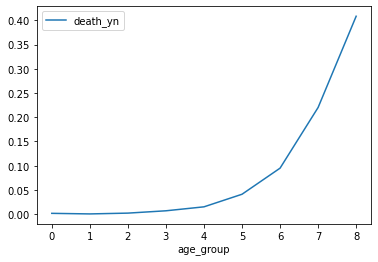

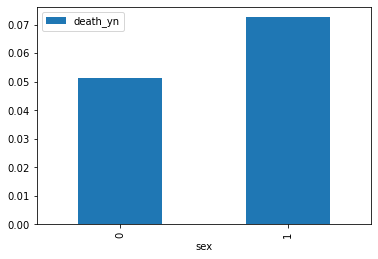

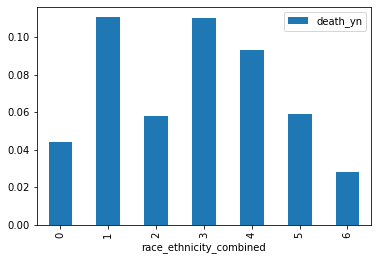

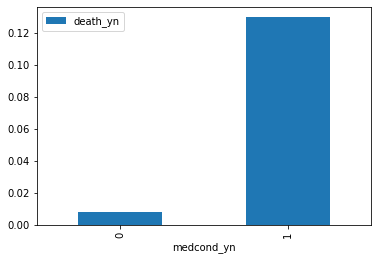

In [13]:
df_age_hosp = df[['age_group', 'death_yn']]
df_age_hosp.groupby(['age_group']).mean().plot()

df_sex_hosp = df[['sex', 'death_yn']]
df_sex_hosp.groupby(['sex']).mean().plot(kind="bar")

df_race_hosp = df[['race_ethnicity_combined', 'death_yn']]
df_race_hosp.groupby(['race_ethnicity_combined']).mean().plot(kind="bar")

df_med_hosp = df[['medcond_yn', 'death_yn']]
df_med_hosp.groupby(['medcond_yn']).mean().plot(kind="bar")